# Solutions Q45 - 52

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## Q45 answer
The potential has the value $V = 0.25x^2$. Using equation (41) the energy change to first order the $n6\text{th}$ level is given by 

$$\displaystyle E_n^{(1)}=\frac{1}{2L}\int\limits_0^L \sin\left(n\pi \frac{x}{L}\right)x^2\sin\left(n\pi \frac{x}{L}\right)dx$$ 

The perturbation 'particle in a box' code used in the text can be simply modified to do the calculation. The energies in cm$^{-1}$ are 
$E_1^{(1)} = 410.86,\,   E_2^{(1)} = 888.65, \,  E_1^{(2)} = -9.53,  \,  E_2^{(2)} = -8.98$.

## Q46 answer
The orthogonality of the wavefunctions means that $\int \psi_n\psi_m dx = \delta_{nm}$ therefore only terms with $n = m$ are non-zero, and this condition produces the normal, unperturbed, energies. The first-order corrections to the energies are given by the equation 

$$\displaystyle E_n^{(1)} =\int\limits_\infty^\infty \psi(n,x)\,x\,\psi(n,x)dx$$

In this case as the $\psi$ are real, the complex conjugate has no meaning. Multiplying by the 'operator' $x$ will not change the wavefunction but will change the integral. By symmetry, $\psi^2$ has to be symmetric about zero; multiplying by $x$ will make the product 

$$\displaystyle \psi(n,x)\,x\,\psi(n,x)$$

which is an odd function ( e.g. $f(x)= -f(x)$ ) and so the integral forming $E_n^{(1)}$ should be zero as the integration limits are symmetrical about zero. This means that all the first order corrections will be zero no matter what the quantum number.

Looking at the wavefunctions (see fig 15 below) they have an alternate 'even /odd' character which means that 

$$\displaystyle \int\limits_\infty^\infty \psi(m,x)\,x\,\psi(n,x)dx \ne 0\quad\text{ if }\quad n = m\, \pm 1, \, \pm 3, \cdots$$

However, in evaluating these integrals it is found that only the $n=m \pm 1$ is not zero. The others ($\pm$ 3, 5 $\cdots$) are accidentally zero due to the shape of the wavefunctions. 

The calculation of $\int H(n,x)\,x\,H(m,x)dx$ using SymPy is shown next for a range of $n$ and $m$. In calculating the second order correction (eqn. 44) a series is summed over index $k$, and there are only two values that are not zero, so the sum has terms only where $k = n \pm 1$. The calculation below checks values and adds terms.

In [2]:
from sympy.functions.special.polynomials import hermite            

n, m, x,alpha,hbar,omega = symbols('n,m,x,alpha,hbar,omega',positive=True) #using sympy

E = lambda n:hbar*omega*(n+1/2)
#-------------------------------------
def psi(n):     # wavefunction, factorial is an inbuilt  SymPy function
    return 1/sqrt(2**n*factorial(n))*sqrt(sqrt(alpha/pi))*\
           hermite(n,x*sqrt(alpha))*exp(-(alpha*x**2)/2) 
#-------------------------------------
print('{:s}'.format('non-zero values;2nd order correction'))
print('{:s}'.format('n,  sum(int(psi(n) * psi(m))**2)/(E(n)-E(m))' ) )

alist = []                                    # list to hold results for printing
s = 0
for n in range(5):
    s = 0
    for m in range(0,8,1):
        if n != m:
            f01 = psi(n)*x*psi(m)
            #f01 = psi(n)*x**3*psi(m)                      # use this for Q47
            ans = integrate(f01,(x,-oo,oo),conds='none')   # integrate algeraically
            #print(n,m,ans/(E(n)-E(m)))
            if ans != 0:                                   # check if integral is zero
                s = s + ans**2/( E(n) - E(m) )             # add each 2nd order term
    alist.append(s)                                        # add to list   

for i in range(5):
    print(i,alist[i])

non-zero values;2nd order correction
n,  sum(int(psi(n) * psi(m))**2)/(E(n)-E(m))


0 -0.5/(alpha*hbar*omega)
1 -0.5/(alpha*hbar*omega)
2 -0.5/(alpha*hbar*omega)
3 -0.5/(alpha*hbar*omega)
4 -0.5/(alpha*hbar*omega)


These results produce $\displaystyle\left | \int\psi(n)\,x\,\psi(m)dx\right|^2$, see eqn 44. The result can now be found because the denominator is always the difference in energy between the two levels, which is $\pm \hbar\omega$. Thus for $n = 0$ the correction is $-1/(2\alpha\hbar\omega)$ and substituting for $\displaystyle \alpha =\sqrt{k\mu}/\hbar=\mu\omega/\hbar$ gives $\displaystyle E_1^{(2)}= -\frac{a^2}{2\mu\omega^2}$

The terms from $n = 1$ go to $n = 0, 2$ and these have values $\displaystyle E_1^{(2)}= +\frac{a^2}{2\mu\omega^2}-\frac{a^2}{\mu\omega^2} =-\frac{a^2}{2\mu\omega^2} $. Similar calculations for other levels produce the same result. The energy is 

$$\displaystyle  E_n= \hbar\omega(n+1/2) -\frac{a^2}{2\mu\omega^2} $$

which shows that the potential is lowered by a constant amount, independent of the quantum number. Coincidentally, this perturbation result is the same as an exact calculation. The electric field simply lowers the potential energy. It does not change the spectrum because the shape of the potential, or equivalently the force constant, is unaffected and therefore the quantum number does not enter into the correction term. In SI units the constant $a$, is $Ee/4\pi \epsilon_0$ where $E$ is the electric field intensity, $e$ the electronic charge and $\epsilon_0$ the permittivity of free space.

## Q47 answer
The second-order correction to the energy is calculated in a similar way to the previous calculation but using $bx^3$ instead of $ax$. The corrections now involve levels $n=\pm$ 1, 3 and the corrections are 

$$\displaystyle E_0^{(2)} = -\frac{11}{8}\frac{b^2}{\alpha^3\hbar\omega}\quad\text{ and }\quad \displaystyle E_1^{(2)} = -\frac{71}{8}\frac{b^2}{\alpha^3\hbar\omega}$$  

The difference in energy levels becomes 

$$\displaystyle \Delta E_{01}= \hbar \omega -\frac{60}{8}\frac{b^2}{\alpha^3\hbar\omega},\quad\text{and}\quad\displaystyle \Delta E_{1,2} = \hbar\omega -\frac{120}{8}\frac{b^2}{\alpha^3\hbar \omega } $$

so that the energy gaps become smaller as $n$ increases, as is expected for an anharmonic potential. Thus the spectrum is a series of lines approaching a limit provided that the temperature is high enough to populate several vibrational levels.

**Exercise:** Repeat the calculation with a quartic potential term, $bx^4$, or both cubic and quartic.

## Q48 answer
(a) Solving the equation by differentiating the wavefunction produces the energy of level $n$ as $\displaystyle E_n=n^2\frac{\hbar^2}{2\mu}$. 

(b) Because $n = 0$ and the potential is not zero only from $\pm a \pi$ the first-order perturbation is the integral (equation (41)),

$$\displaystyle E^{(1)}=\frac{V}{2\pi}\int\limits_{-a\pi}^{a\pi}d\phi =aV$$

The second-order correction contains the integral $\langle\psi_0^k | V |\psi_n^0 \rangle$ and in the bra; the left-hand wavefunction must be made into its complex conjugate. The integral is

$$\displaystyle \begin {align} 
\langle \psi_k^0|V| \psi_n^0 \rangle &= \frac{V}{2\pi} \int\limits_{-a\pi}^{a\pi} e^{ik\phi} e^{in\phi} = \frac{V}{2i\pi}\left. \frac{e^{i(n-k)}}{n-k} \right|_{-a\pi}^{a\pi} \\&=\frac{V}{\pi(n-k)}\frac{e^{i\pi(n-k)a} -e^{-i\pi(n-k)a} }{2i}\\&=\frac{V}{\pi(n-k)}\sin\left((n-k)a\pi\right) 
\end{align}$$

Because we are dealing only with the lowest level (otherwise we would have to use degenerate perturbation theory) $n = 0$ and the integral becomes $\displaystyle \langle \psi_k^0|V| \psi_n^0 \rangle =-\frac{V}{k\pi}\sin(ak\pi)$ and because the lowest unperturbed energy is zero the energy (equation (44)) is the summation,

$$\displaystyle E_n^{(2)}=-\left( \frac{V}{\pi}\right)^2 \sum_{k=\pm 1,\pm 2 \cdots} \frac{|\sin(-ak\pi)|^2}{k^2E_k^0}$$

which is two summations; one with $k = 1, 2, 3$, because $k = n = 0$ is excluded, and the other with $k = -1, -2, -3$. Since $\sin(-x) = -\sin(x)$ squaring terms makes them both positive. These two series are the same and the summation is therefore doubled to give

$$\displaystyle E_n^{(2)}=-2\mu\left( \frac{V}{\pi\hbar}\right)^2 \sum_{k=1} \frac{|\sin(-ak\pi)|^2}{k^4}$$

The total energy of the lowest level corrected to second order is $E=aV-E_n^{(2)}$. In the case that $a = 1/6$ the summation rapidly converges to $\approx 0.313$, because of the influence of the $k^{-4}$ term. As the potential is $V = 0.1E_1 = \hbar^2/20\mu$ the energy is $E = 0.01651\hbar^2/\mu$ which is very small compared to the energy $E_1-E_0$ energy gap of $0.5\hbar/\mu$.

## Q49 answer
(a) The frequency is calculated with $\Delta E =h\nu $ and $\omega = 2\pi\nu $ or $\omega=(E_4 - E_3)/\hbar $ radian/sec which is $\displaystyle \omega = 7\frac{2\pi h}{8mL^2} = 4\cdot 10^{15}\,\mathrm{ rad\, s^{-1}}$  and the period $2\pi/\omega = 1.57 \cdot 10^{-15}$s.

(b) The superposition is $\Psi=N(\psi_1/2+2\psi_2/3)$ where  $N=(1/4+4/9)^{-1/2}=6/5$ is the normalisation. Substituting into equation (54) produces,

$$\displaystyle P(x,t)=\left[ \frac{3}{5}\psi_3^0(x) \right]^2+\left[ \frac{4}{5}\psi_4^0(x) \right]^2+\frac{24}{25}\psi_3^0\psi_4^0\cos(\omega t)$$

Python is used to do the calculation then plot the function. The coefficients $c_1,\, c_2$ (below) represent the amounts of $\psi_1$ and $\psi_2$. The wavefunction is made into a function of $n,\, x$ and $t$. The complex unit $i$ is represented in python as a capital 1j. Equation (53) is used as this is the most general form.

normalisation   1.20
energy n= 3,4   5.422e-19    9.64e-19
frequency 1/sec  3.999e+15
period s  1.571e-15



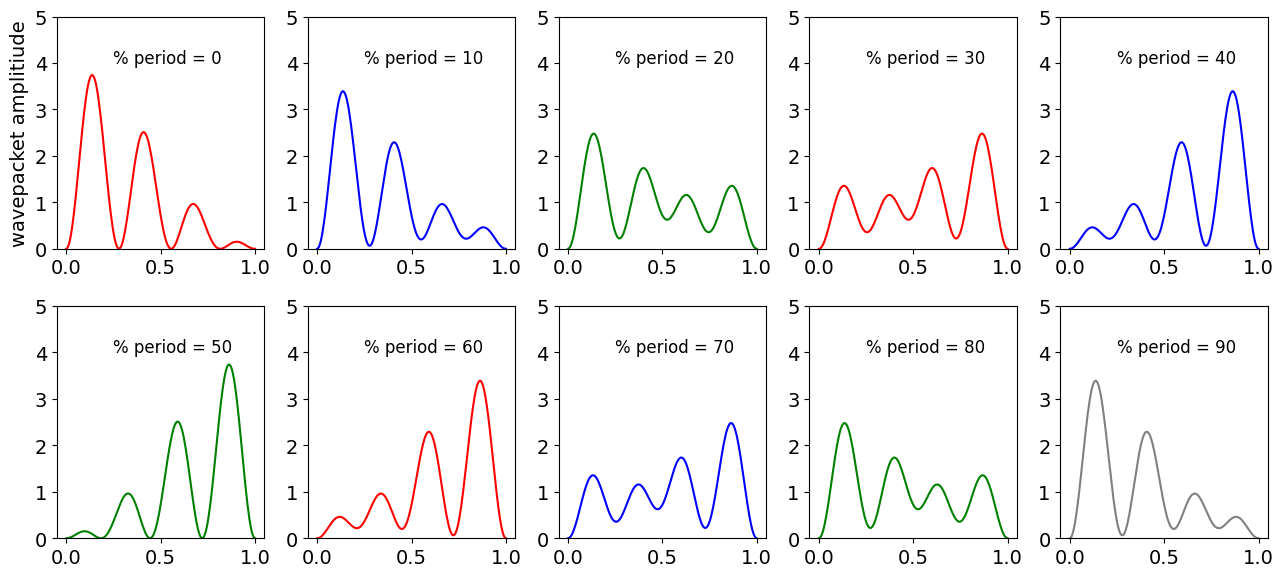

In [3]:
# wavepacket of particle in a box wavefunctions 
fig1 = plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 14})  # set font size for plots
ax = [plt.subplot(2,5,i) for i in range(1,11,1)] # ax0 to ax10

m = 9.109e-31      # mass electron kg
h = 6.626e-34      # Planck constant J s
nm= 1e-9
L = 1*nm           # box length m 
c1= 1/2.0
c2= 2/3.0          # coefficients

N = 1.0/np.sqrt(c1**2 + c2**2)         # normalisation
E = lambda n: (h*n)**2/(8*m*L**2)    # energy J
omega = (E(4)-E(3))*2*np.pi/h        # frequency s^(-1)
period = 2*np.pi/omega               # s

print('{:s} {:6.2f}\n{:s} {:10.4g}  {:10.4g}\n{:s} {:10.4g}\n{:s} {:10.4g}\n'.\
  format('normalisation', N, 'energy n= 3,4 ',E(3),E(4),'frequency 1/sec', omega,'period s', period))

psi = lambda x,n,t: np.sqrt(2/L)*np.sin(n*np.pi*x/L)*np.exp(-1j*2*np.pi*E(n)*t/h)  # wavefunction
 
prob= lambda x,n,m,t: 1e-9*N**2*((c1*psi(x,n,t) + c2*psi(x,m,t))* np.conjugate(c1*psi(x,n,t)+ c2*psi(x,m,t))).real

x = np.linspace(0,L,200)
cols=['red','blue','green','red','blue','green','red','blue','green','grey','black']
tmes = [i for i in range(10)]
for j, i in enumerate(tmes):
    tme = i*period/10
    ax[j].plot(x/nm, prob(x,3,4,tme),color=cols[j])
    #ax[j].set_xlabel('x /nm')
    ax[j].annotate('% period = '+str(i*10),xy=(0.25,4),fontsize=12 )
    ax[j].set_ylim([0,5])

ax[0].set_ylabel('wavepacket amplitiude')
plt.tight_layout()
plt.show()

Figure 34. Superposition of time dependent wavefunctions (probability) changing with time pictured in units of the oscillation period for the $3^{rd}$ and $4^{th}$ wavefunction for a particle in a box. (The probability is arbitrarily divided by $10^9$ to make a sensible scale and each x-axis is in nm).
____

## Q50 answer
(a) Substituting for energy produces 

$$\displaystyle \Psi(x,t)=\sum\limits_n a_n\psi_n(x) e^{-iE_nt/\hbar} = \sum\limits_n a_n\psi_n(x)e^{-i\omega(n+1/2)t/\hbar}$$

and at times $t = mT = 2\pi m/\omega$, which are $m$ multiples of the period $T$, gives 

$$\displaystyle \Psi(x,mT)=\sum\limits_n a_n\psi_n(x)e^{-2i\pi nm}e^{-i\pi m}$$

In the summation $n$ is a positive integer as is $m$, which is the number of periods. The first exponential term $\displaystyle e^{-2i\pi nm}=1$ is the same for all positive integer $m$ values because 2$n\cdot m$ is an even number and $\displaystyle e^{-2i\pi}=e^{-4i\pi}=\cdots$ = 1. The identities $e^{-i\pi} = -1,\, e^{-2i\pi} = 1$ can now be used to find higher powers; for example, $e^{-3i\pi} = -1$, and so forth. Therefore, the second exponential has the form $e^{-mi\pi} = (-1)^m$. Substituting into the last equation gives, $\displaystyle \Psi(x,mT) = \sum\limits_n \psi_n(x)(-1)^m$ and therefore

$$\displaystyle  \Psi(x,mT)=(-1)^m\Psi_n(x,0)$$

This means that the wavepacket periodically reforms itself, but only within a change in sign. The probability density is the square of the wavepacket amplitude, which reforms itself exactly after each successive period, and appears to be the mirror image of itself after exactly $1/2$ a period.

(b) In calculating the wavefunction, the Hermite polynomials are needed. These have been used in question 46 but now numerical values, not algebraic are needed so we need to use numpy instead of SymPy

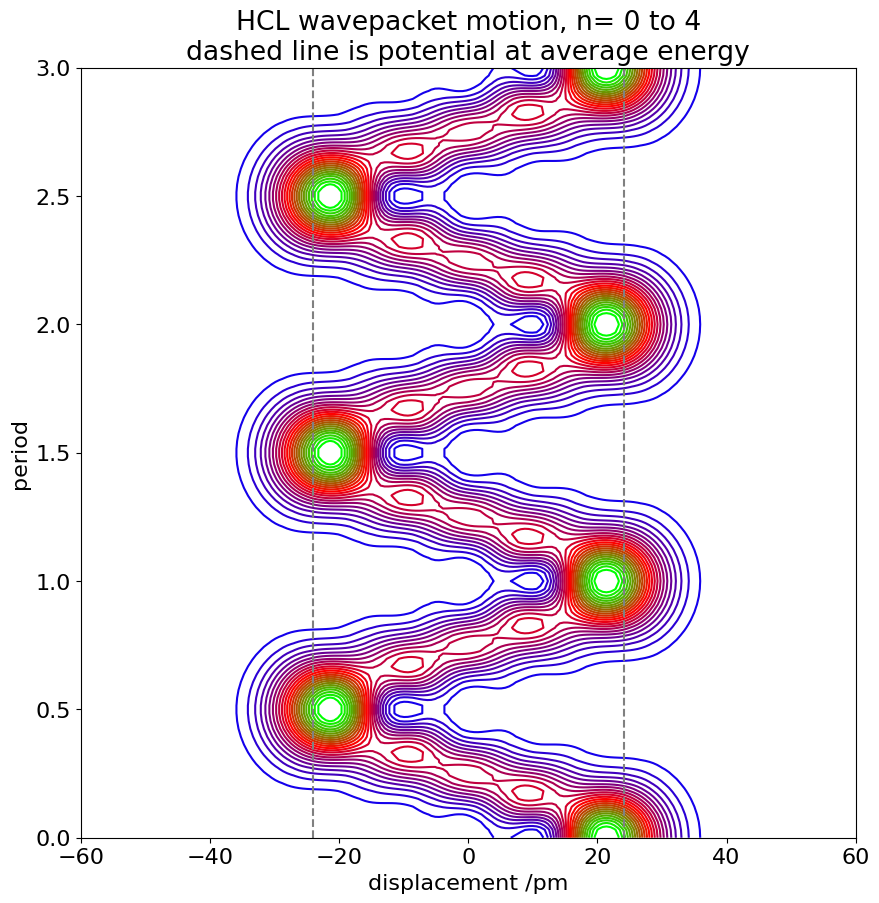

In [4]:
# wavepacket calculation  This code follows some of the calculation desribed in the text.
#--------------
def Hermite(n,x):       # use recursion formulae, x is real, n is order.
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        return 2*x*Hermite(n-1,x) - 2*(n-1)*Hermite(n-2,x)
#--------------
def fact(n):           # factorial accurate for n<100 only
    if n ==0 or n==1:
        return 1
    else:
        return n*fact(n-1)
#--------------  

fig1= plt.figure(figsize=(10, 10))   # use figure to define plot size
plt.rcParams.update({'font.size': 16})  # set font size for plots

pm = 1e-12                    # picometres
ps = 1e-12                    # picoseconds
amu= 1.6604e-27               # kg       
c  = 2.9979e10                # cm/s
h  = 6.6256e-34               # J.s
mu = 1*35/(1 + 35)*amu        # kg
nu = 2989.7                   # HCl frequency in cm^(-1)
k  = (2*np.pi*nu*c)**2*mu     # force constant N.m 
alpha  = 2*np.pi*np.sqrt(mu*k)/h # 
aperiod= 2.0*np.pi/(nu*c)        # seconds

ni = 0                           # initial and final quantum numbers
nf = 5
cn  = [0.1, 0.2, 0.25, 0.2, 0.1] # wavepacket coefficients

V    = lambda x: 0.5*k*x**2/(h*c)    # potential energy in cm^(-1)
Enrg = lambda n, nu: nu*(n+1/2)      # energy cm^(-1)
avE  =  sum([Enrg(n,nu)*h*c for n in range(ni,nf,1)])/len(cn)

psi  = lambda x, n, alpha: np.sqrt( 1/(2^n*fact(n)) * np.sqrt(alpha/np.pi) )*\
                np.exp(-alpha*x**2/2.0)*Hermite(n,x*np.sqrt(alpha))  # harmonic ascillator wavefunction
# wp adds up wavefunctions
wp =   lambda x,tm: sum([ cn[n-ni]*psi(x,n,alpha)*np.exp(-1j*Enrg(n,nu)*c*tm) for  n in range(ni,nf)]  )  
    
numx = 200                       # spatial points
numt = 100                       # time points 
x = np.linspace(-60*pm,60*pm,numx)
y = np.linspace(0, 3*aperiod,numt)

xvals,tvals = np.meshgrid(x,y)          # set up grid of points to plot contour
prob = np.zeros((numt,numx),dtype=float)
prob = 1e-10*(wp(xvals,tvals) * np.conjugate(wp(xvals,tvals))).real   # scale by 10^-10  

levs=[i for i in np.linspace(0,2.0,25)]  # 25 levels between 0 and 2
plt.contour(xvals/pm,tvals/aperiod,prob, cmap = plt.cm.brg, levels=levs) 
plt.axvline( np.sqrt(2*avE/k)/pm,linestyle='dashed',color='grey')
plt.axvline(-np.sqrt(2*avE/k)/pm,linestyle='dashed',color='grey')
plt.ylabel( 'period')
plt.xlabel('displacement /pm')
plt.title('HCL wavepacket motion, n= '+str(ni)+' to '+str(nf-1)+'\ndashed line is potential at average energy')
plt.show()

Figure 35. Probabilities of a wavepacket made from five harmonic oscillator wavefunctions vs period $t$ and bond displacement $x$. The wavepacket consists of the $n = 0 \to 4$ vibrational levels of HI over two vibrational periods; a period is $14.4$ fs.
____
## Q51 answer
The wavepacket is $\displaystyle \Psi(r,t)=\sum\limits_n a_n\psi_n(r)e^{-iRt/(n^2\hbar)}$ 

and the radial probability distribution is

$$\displaystyle  P(r,t)= \left |r^2  \sum\limits_n a_n\psi_n(r)e^{-iRt/(n^2\hbar)}  \right|^2$$

The atomic radial wavefunction is $\psi_n(r)$ is the radial wavefunction where $r$ is the distance from the nucleus.
Consulting a textbook, the quantum numbers are $n$, principal, $L$ the angular momentum quantum number $\lt n$ (in the code $L$ is labelled $el$ for clarity below). The Bohr radius is $a_0$, $R$ the Rydberg constant; $r$ is the distance from the nucleus. The units are; time in picoseconds, distances and $a_0$ in nm, Planck's constant is in cm$^{-1}$ ps and therefore $h = 33.35\,\mathrm{ cm^{-1}\, ps}$. 

The complete normalised equation for Hydrogenic atoms using the generalised (associated) Laguerre ($Lg$) the equation is 

$$\displaystyle \Psi_{n,L,M}(r,\theta,\phi)=\left [ \alpha^3 \frac{(n-L-1)!}{2n(n+L)!}    \right]^{1/2} \cdot (\alpha r)^Le^{-\alpha r/2} Lg_{n-L-1}^{2L+1}(\alpha r) Y_L^M(\theta, \phi)$$

but the angular part is not needed and so can be ignored including its normalisation is $\sqrt( (2n+1)/(4\pi))$ since this only depends slightly on $n$ over the range of $n$ used. For hydrogen $Z = 1,\, Lg$ is the generalised Laguerre polynomial and $\alpha =2Z/(na_0)$. The calculation is quite slow, $\approx 10$ secs.

quantum numbers [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
time / point ps 1.001957
distance / point pm 0.310673


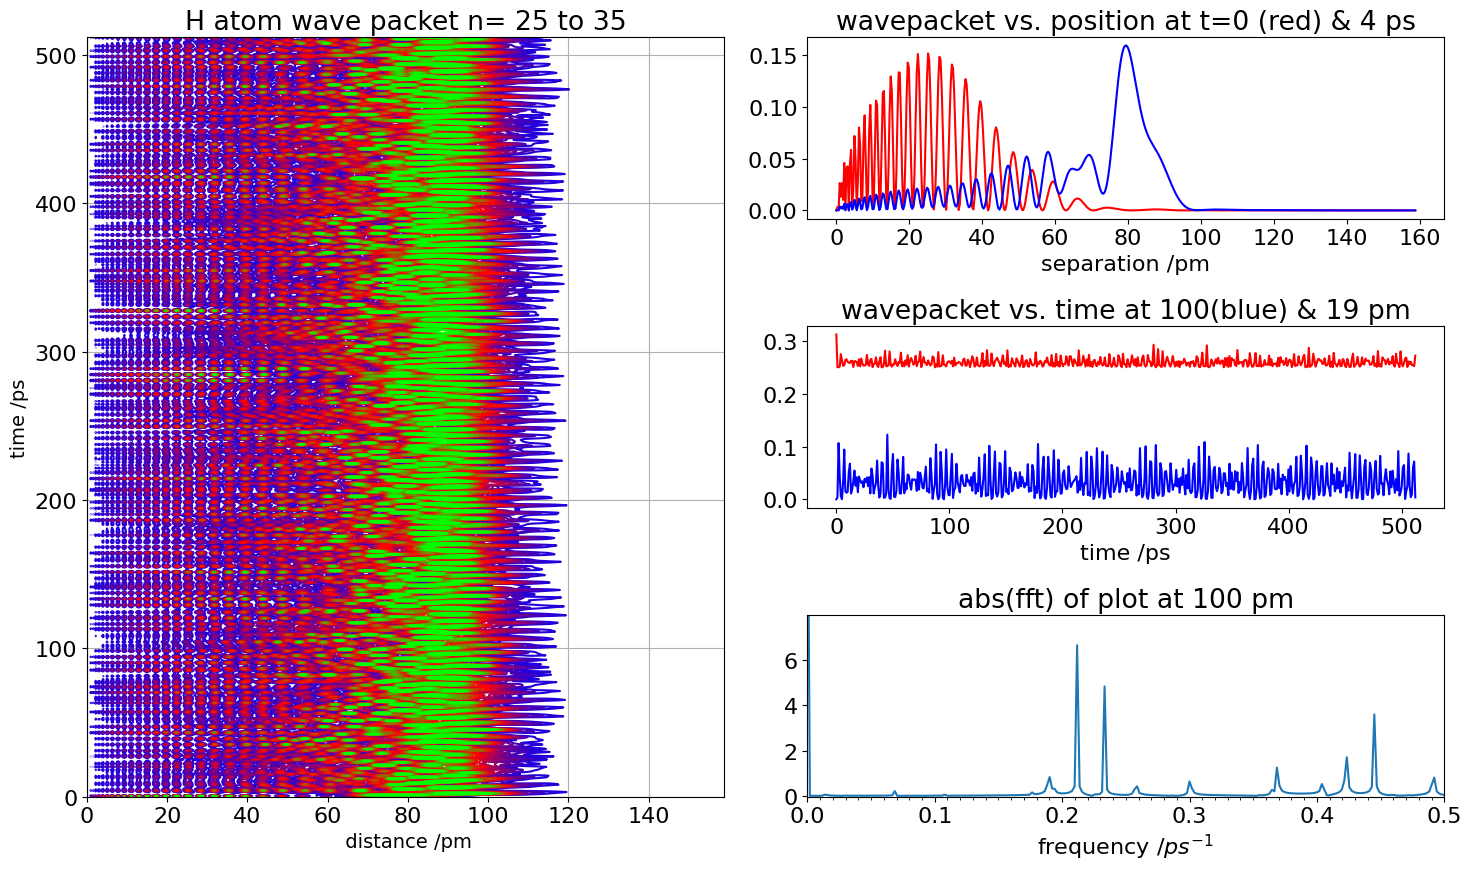

In [5]:
from scipy.special import eval_genlaguerre  as GL

fig1= plt.figure(figsize=(15, 9))       # use figure to define plot size and subplots
plt.rcParams.update({'font.size': 16})  # set font size for plots
ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(3,2,2)
ax2 = plt.subplot(3,2,4)
ax3 = plt.subplot(3,2,6)
#-------------
def fact(n):           # factorial
    if n == 0 or n == 1:
        return 1
    else:
        return n*fact(n - 1)
#--------------  
# radial function next
Radl = lambda n, el, r:   np.sqrt( ( fact(n-el-1) * (2/(n*a0))**3)/(2*n*fact(n+el)) )\
                 * ( (2*r)/(n*a0))**el *np.exp(-r/(n*a0) )* GL( n-el-1,2*el+1,(2.0*r)/(n*a0) )   

pm = 1e-12
ps = 1e-12
R  = 109737.0                  # Rydberg in cm^(-1)
h  = 5.308*2*np.pi             # cm^(-1) ps
a0 = 0.052918                  # Bohr radius nm

r1 = 100                        # r1, r2 two plots. Set separation from nucleus ( pm) to plot wavepacket profile vs time
r2 = 19
cn = [ 0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1 ]  # amplitudes a   
el = 1                         # p orbital L=1
n0 = 25                        # lower q number 
qn = [ n0+i for i in range( 0,len(cn)) ]   # range of q numbers same length as cn    
print('{:s}{:s}'.format('quantum numbers ',str(qn)))

psi = lambda r, n, el, t: r*Radl( n, el, r)*np.exp( 2*np.pi*1j*R*t/(h*n**2) )  # time dep wavefunction

wp = lambda r,el,t: sum( [cn[n-n0]*psi(r,n,el,t) for n in qn ])  # wavepacket , sum over n 

numr  = 512                        # spatial points pm
numt  = 512                        # time points  ps
tstep = 1
xr = np.linspace(0, 3000*a0, numr) # fix size of radial calculation
yt = np.linspace(0,tstep*numt,numt)# fix time range 

print('{:s} {:f}'.format('time / point ps', yt[1]-yt[0]))
print('{:s} {:f}'.format('distance / point pm', xr[1]-xr[0]))

rvals,tvals = np.meshgrid(xr,yt)                                       # set up grid of points to plot contour

aprob = (wp(rvals,el,tvals) * np.conjugate(wp(rvals,el,tvals))).real   # make Psi^*Psi; divide by 10^-12 toscale
Lvls= [i for i in np.linspace(0,0.1,15)]         # adjust linspace to chnage range & number of contours

ax0.contour(rvals,tvals, aprob, cmap = plt.cm.brg, levels=Lvls) 
ax0.xaxis.grid(True, zorder=0)
ax0.yaxis.grid(True, zorder=0)
ax0.set_title('H atom wave packet n= '+str(qn[0])+ ' to '+str(qn[10]))
ax0.set_xlabel(' distance /pm',fontsize=14)
ax0.set_ylabel('time /ps',fontsize=14)

#ax0.set_ylim([0,100])  #. adjust limits to expand in on region
# calculate just certain values at fixed x and all times. Equivalent to probing at certain wavelengths

func = lambda rval :(wp(rval,el,yt) * np.conjugate(wp(rval,el,yt))).real

ax1.plot(xr, aprob[0],color='red')         
ax1.plot(xr, aprob[5],color='blue')
ax1.set_title('wavepacket vs. position at t=0 (red) & 4 ps')
ax1.set_xlabel('separation /pm')

ax2.plot(yt, func(r1),color='blue')
ax2.plot(yt, func(r2)+0.25,color='red')
ax2.set_title('wavepacket vs. time at '+str(r1)+ '(blue) & '+str(r2)+ ' pm')
ax2.set_xlabel('time /ps')

isfft = np.fft.rfft(func(r1))
freq =  np.linspace(0,1.0/(2*tstep),numt//2)
fmax =  max(freq)
ymax =  max(np.abs(isfft[2:]))
ax3.plot(freq,np.abs(isfft[:-1]))
ax3.set_xlim([0.0,fmax])
ax3.set_ylim([-0.02,ymax*1.2])

minor_ticks=np.linspace(0,fmax,51)
ax3.set_xticks(minor_ticks, minor=True)
ax3.set_title('abs(fft) of plot at '+str(r1)+' pm')
ax3.set_xlabel('frequency /'+ r'$ps^{-1}$')

fig1.tight_layout()
plt.show()

Figure 36. Left. Contour map of the motion of a H atom Rydberg wavepacket excited to $n = 25 \to 35$ by a short laser pulse. Green has the greatest amplitude, blue the least. Right, top profile of wavepackets vs distance from nucleus, and lower, time profile of wavepacket motion at the separations shown. Bottom right Fourier transform of a wavepacket vs time at $90$ nm shows that many different frequencies are in the wavepacket. 
____

After about $6$ ps the wavefunctions have constructively interfered to form a more compact wavepacket at the outer turning point; $\approx 100$ nm, see the top right figure. The wavepacket recurs with periods of about $4$ ps, plus longer periods of about $40$ ps. If the atom could be measured vs time at 90 nm the signal would look like that shown on the right bottom. The top right figure shows the spatial shape of the wavepacket at two different times.

(b) The size of the Rydberg atom with $n = 30$ is vast, $\approx 2a_0n^2$ or $\approx 95$ nm, compared to the H atom in its ground state, with its classical radius $a_0 = 0.0529$ nm. The oscillation frequency is 

$$\displaystyle \omega = \frac{1}{\hbar}\bigg|\frac{dE_n}{dn}\bigg|=\frac{2R}{\hbar n^3}$$

which is a frequency of $\nu=\omega/2\pi$ per second or a period of $4.1$ ps. 

## Q52 answer
(a) Using information in the question the fluorescence signal is the square of the sum of the amplitudes of each path, $1\to 2$ and $1\to 3$, and using equation (56), 

$$\displaystyle f(t)=A\left| \int \varphi_3\mu [a_1\varphi_1e^{-iE_1t/\hbar -kt/2+}+a_2\varphi_1e^{-iE_2t/\hbar -kt/2+}]dq  \right |^2$$

Expanding inside the absolute value brackets | | and substituting for the integrals, which are in spatial coordinates $q$, and not time gives 

$$\displaystyle \displaystyle F(t)=A\left|a_1B_{31}e^{-iE_1t/\hbar-kt/2}+a_1B_{31}e^{-iE_1t/\hbar-kt/2}\right|^2$$

The rule for calculating absolute values of any complex number $z$ is $| z |^2 = z^*z$, where $z^*$ is the complex conjugate of $z$ obtained by replacing $i$ with $-i$. Doing this the fluorescence intensity at time $t$ is;

$$\displaystyle f(t)= A\left[(a_1B_{31})^2 +(a_2B_{32})^2 +a_1a_2B_{31}B_{32}(e^{i(E_1-E_2)t/\hbar} + e^{-i(E_1-E_2)t/\hbar}) \right]e^{-kt}$$

Making the energy gap $E_2 - E_1 = \Delta E$ and using the definition of a cosine $2\cos(x) = e^{ix} + e^{-ix}$ gives

$$\displaystyle f(t)= A\left[(a_1B_{31})^2 +(a_2B_{32})^2 +2a_1a_2B_{31}B_{32}\cos(\Delta E \cdot t/\hbar)\right]e^{-kt}$$

This expression shows us that the fluorescence signal decays overall with a rate constant $k$. This is because the whole expression is multiplied by $e^{-kt}$ and the decay is modulated by the cosine term.

hbar  =  5.30584 cm^(-1) ps


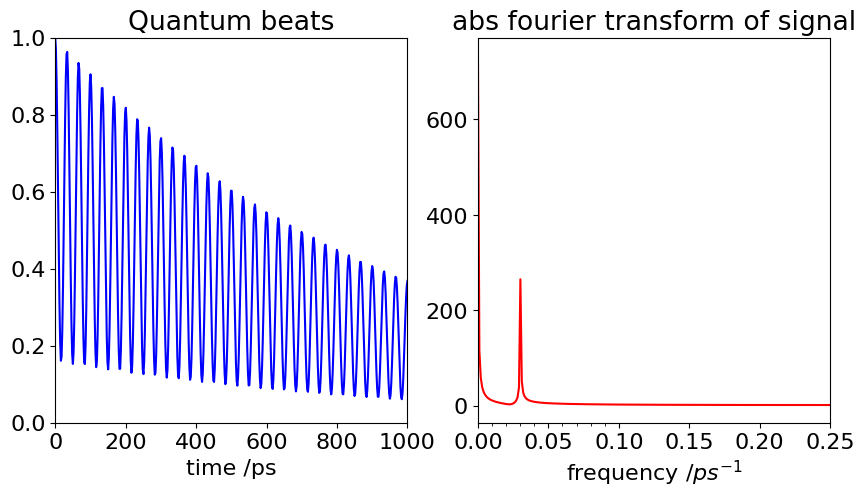

In [6]:
# Quantum Beat calculation
fig1= plt.figure(figsize=(10, 5.0))   # use figure to define plot size and subplots
ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)

deltaE = 1.0     # cm-1
a1     = 0.3
a2     = 0.7
B31    = 2.0
B32    = 2.0
ps     = 1e-12   
k      = 1e9*ps                 # rate const of 10^9 /sec = 10^(-3) /psec
hbar   = 1.054e-34*5.034e22/ps  # to cm-1 ps
print('{:s} {:g} {:s}'.format('hbar  = ', hbar, 'cm^(-1) ps'))

f= lambda t: ((a1*B31)**2+ (a2*B32)**2 + 2*a1*a2*B31*B32*np.cos(deltaE*t/hbar))*np.exp(-k*t)

numt = 500
T = 2.0                             # T is gap between points
t = np.linspace(0, numt*T, numt)    # t in ps
ax0.plot(t,f(t)/f(0),color='blue')
ax0.set_ylim([0,1])
ax0.set_xlim([0,1000])
ax0.set_xlabel('time /ps')
ax0.set_title('Quantum beats')

invt  = np.linspace(0,1.0/(2.0*T), numt//2)   # set frequency for fft
isfft = np.fft.rfft(f(t))
freq  = max(invt)
ax1.plot(invt,np.abs(isfft[:-1]),color='red')
ax1.set_xlim([0,freq])
minor_ticks=np.linspace(0,0.1,11)
ax1.set_xticks(minor_ticks, minor=True)
ax1.set_title('abs fourier transform of signal')
ax1.set_xlabel('frequency /'+r'$ps^{-1}$')

plt.show()

Figure 37. Quantum beats with an energy gap $\Delta E = 1\,\mathrm{ cm^{-1}}$, with $a_1 = 0.3, \,a_2 = 0.7, \,B_{31} = B_{32} = 2$ and $k=10^9\,\mathrm{ s^{-1}}$. The beat frequency should be $c\Delta E = 3 \cdot 10^{10}\,\mathrm{ s^{-1}}$. Right. The Fourier transform of the signal is shown. The main feature is the oscillation frequency at $3\cdot 10^{10}\,\mathrm{ s^{-1}}$.
____

If $\Delta E$ were zero the excited levels have the same energy and no beats are observed. Similarly when the integral $B_{32}$ or $B_{31}$ is zero, for example if only one level is observed in emission or only one level is initially excited, then either $a_1$ or $a_2$ is zero and again, no beats are observed. 

The beating or oscillatory signal is due to an interference of the two pathways from levels $1$ and $2$ to level $3$ and is present in the equation as the cross-term in the multiplication. These are also called the off-diagonal terms and are a reference to the matrix formulation of quantum problems. The off-diagonal terms always lead to interactions and time dependence.

(b) The normalization is obtained when $t = 0$ and is $(a_1B_{31} + a_2B_{32})^2$.

**Exercise:** repeat the calculation with four levels with energies above the lowest level of $1, 2$, and $3\,\mathrm{ cm^{-1}}$ excited with amounts $0.3, 0.7, 0.3$, and $0.7$. Assume that the other parameters are the same as in the question. Plot the graph of the decaying signal. Fourier transform it to find the frequencies present.
